In [1]:
from osgeo import gdal, ogr, osr
from fiona.ogrext import Iterator, ItemsIterator, KeysIterator
from geopandas import GeoDataFrame
gdal.VersionInfo()


'3020200'

In [2]:
import geopandas

In [5]:
!pip install descartes
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import style

  Using cached descartes-1.1.0-py3-none-any.whl (5.8 kB)


In [29]:
data=pd.read_csv(r'C:\Users\HP\Carbon emission\co2_emission.csv')

In [30]:
data.columns

Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions (tonnes )'], dtype='object')

In [31]:
data1=data.groupby('Entity').agg({'Annual CO₂ emissions (tonnes )':['mean']}).reset_index()
data1.head()

,Entity,Annual CO₂ emissions (tonnes )
,,mean
0,Afghanistan,2.586999e+06
1,Africa,1.614890e+08
2,Albania,3.262096e+06
3,Algeria,3.803583e+07
4,Americas (other),3.694425e+08


In [32]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<AxesSubplot:>

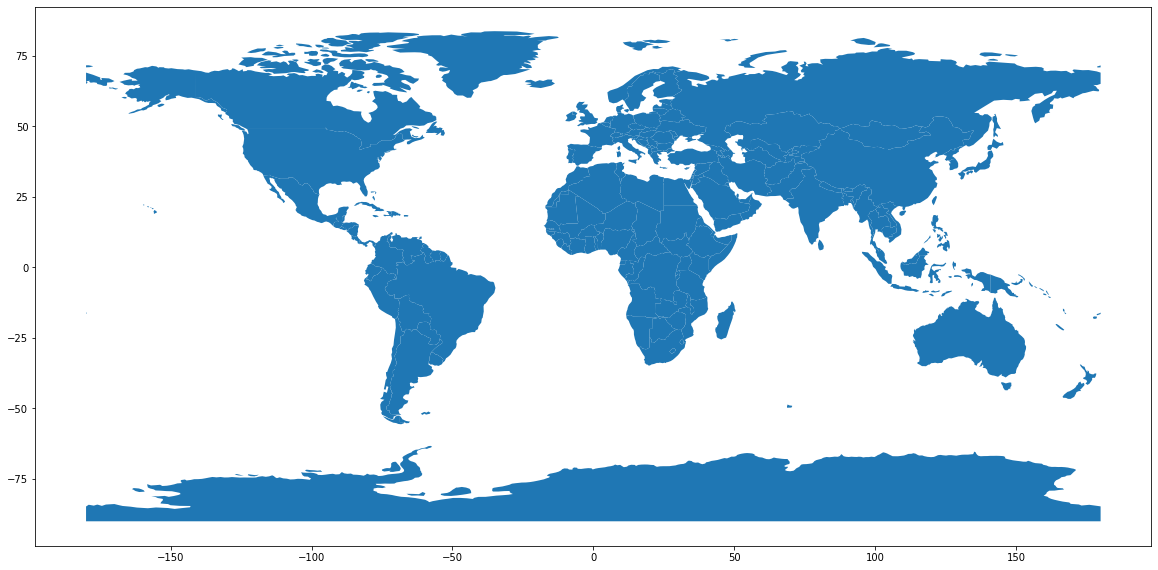

In [33]:
world.plot(figsize=(20,20))

In [34]:
co2=data1[['Entity',
'Annual CO₂ emissions (tonnes )']]

In [35]:
co2.columns=['country','Annual CO₂ emissions (tonnes )']
co2.columns

Index(['country', 'Annual CO₂ emissions (tonnes )'], dtype='object')

In [36]:
world=world.merge(co2,left_on='name',right_on='country',how='outer')
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry',
       'country', 'Annual CO₂ emissions (tonnes )'],
      dtype='object')

In [45]:
world.isna().sum()

pop_est                           77
continent                         77
name                              77
iso_a3                            77
gdp_md_est                        77
geometry                          77
country                           21
Annual CO₂ emissions (tonnes )    21
dtype: int64

In [46]:
world.dropna()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,Annual CO₂ emissions (tonnes )
0,920938.0,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,6.641299e+05
1,53950935.0,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,4.242460e+06
3,35623680.0,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,1.369679e+08
5,18556698.0,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,2.084850e+08
6,29748859.0,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,1.022760e+08
...,...,...,...,...,...,...,...,...
169,11901484.0,Africa,Rwanda,RWA,21970.0,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...",Rwanda,4.268715e+05
171,2103721.0,Europe,Macedonia,MKD,29520.0,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",Macedonia,9.523103e+06
172,7111024.0,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,4.036931e+07
173,642550.0,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,1.858008e+06


<AxesSubplot:>

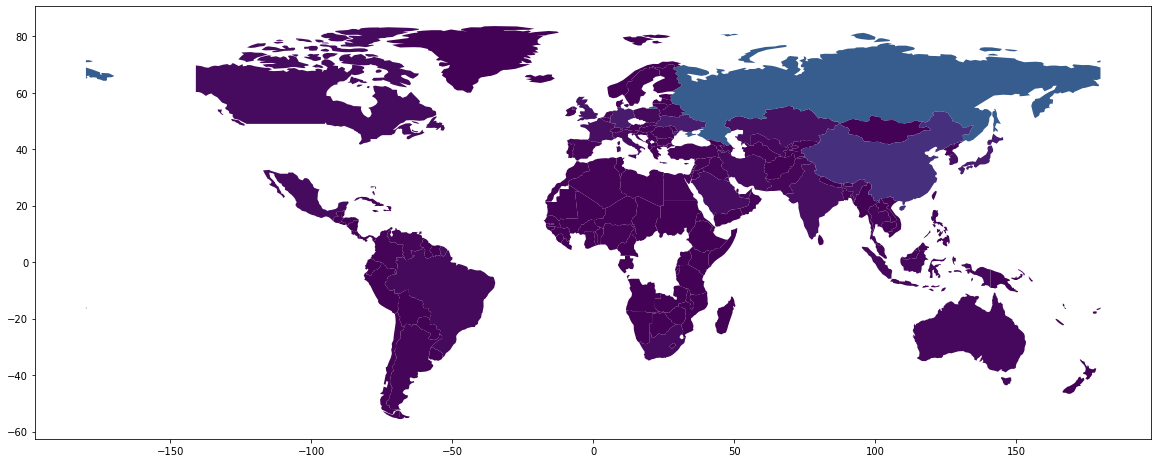

In [49]:
world.plot(column='Annual CO₂ emissions (tonnes )', figsize=(20,20))

<AxesSubplot:>

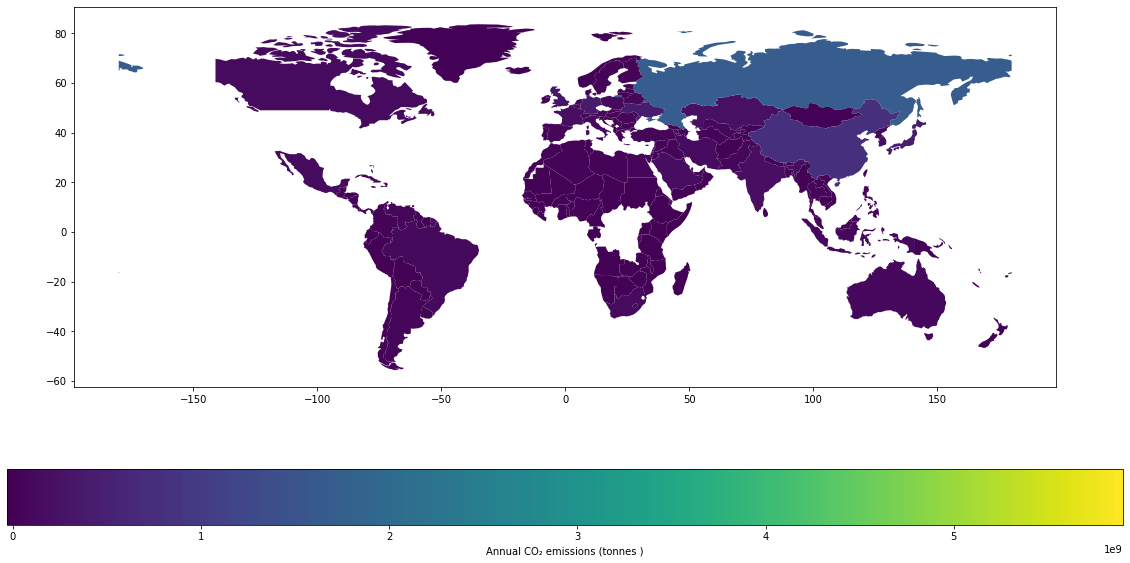

In [39]:
world.plot(column='Annual CO₂ emissions (tonnes )',figsize=(20,10),legend=True,legend_kwds={'label': "Annual CO₂ emissions (tonnes )",'orientation': "horizontal"})

<AxesSubplot:>

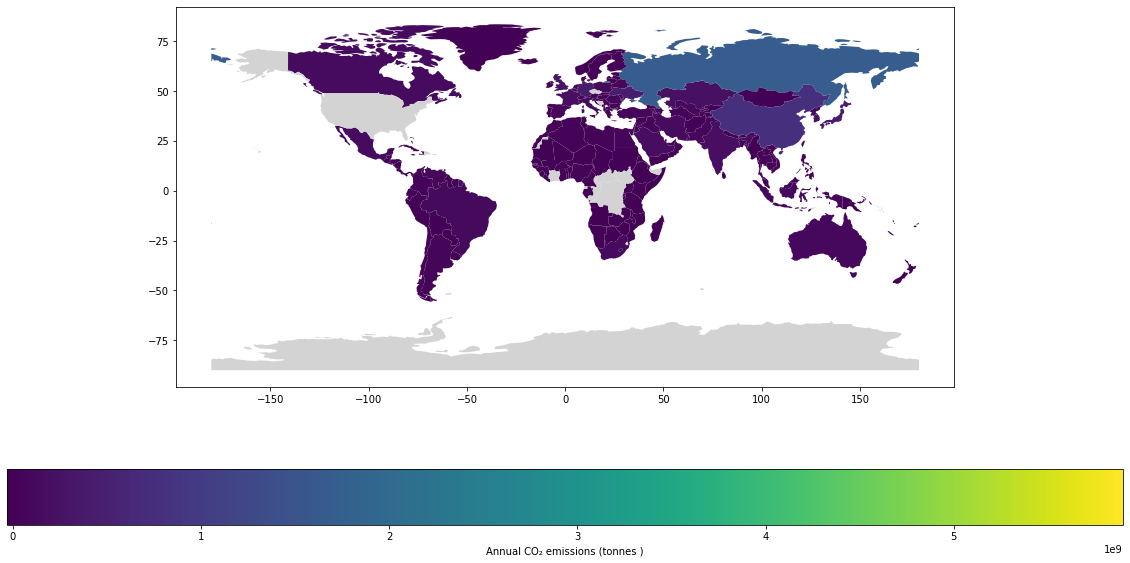

In [50]:
world.plot(column='Annual CO₂ emissions (tonnes )',figsize=(20,10),legend=True,legend_kwds={'label': "Annual CO₂ emissions (tonnes )",'orientation':"horizontal"},missing_kwds={'color': 'lightgrey'})

<AxesSubplot:>

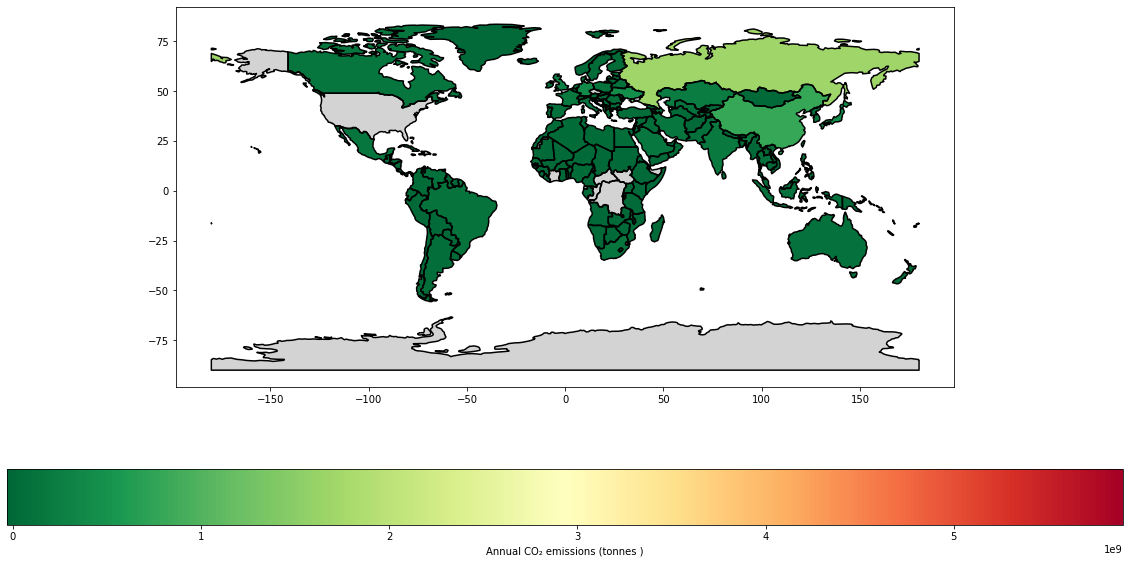

In [51]:
base=world.boundary.plot(figsize=(20,10),edgecolor='black')
world.plot(ax=base,column='Annual CO₂ emissions (tonnes )',figsize=(20,10),legend=True,legend_kwds={'label': "Annual CO₂ emissions (tonnes )",'orientation':"horizontal"},missing_kwds={'color': 'lightgrey'},cmap='RdYlGn_r')

In [53]:
!pip install mapclassify

  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.7
    Uninstalling decorator-5.0.7:
      Successfully uninstalled decorator-5.0.7


<AxesSubplot:>

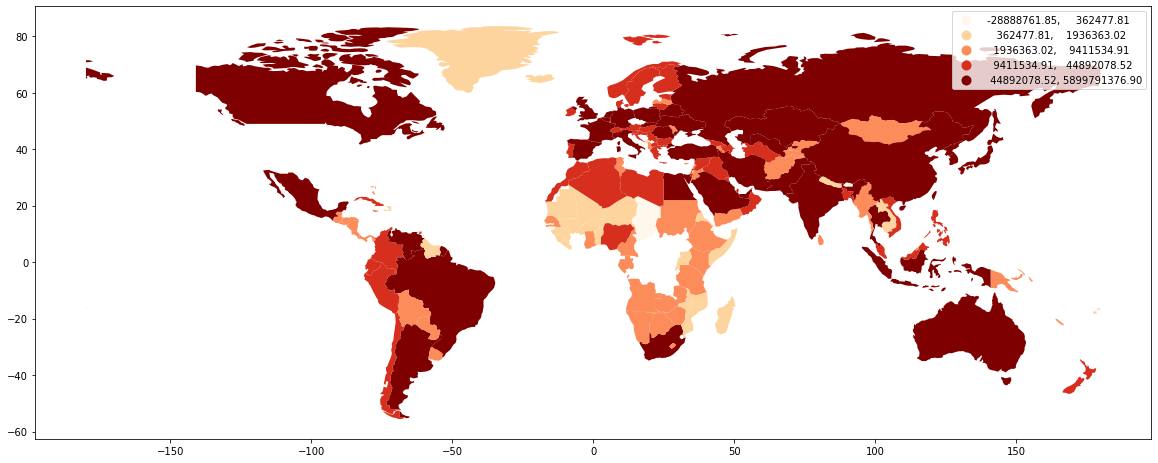

In [58]:
 world.plot(column='Annual CO₂ emissions (tonnes )', cmap='OrRd', scheme='quantiles',legend=True,figsize=(20,15))

<AxesSubplot:>

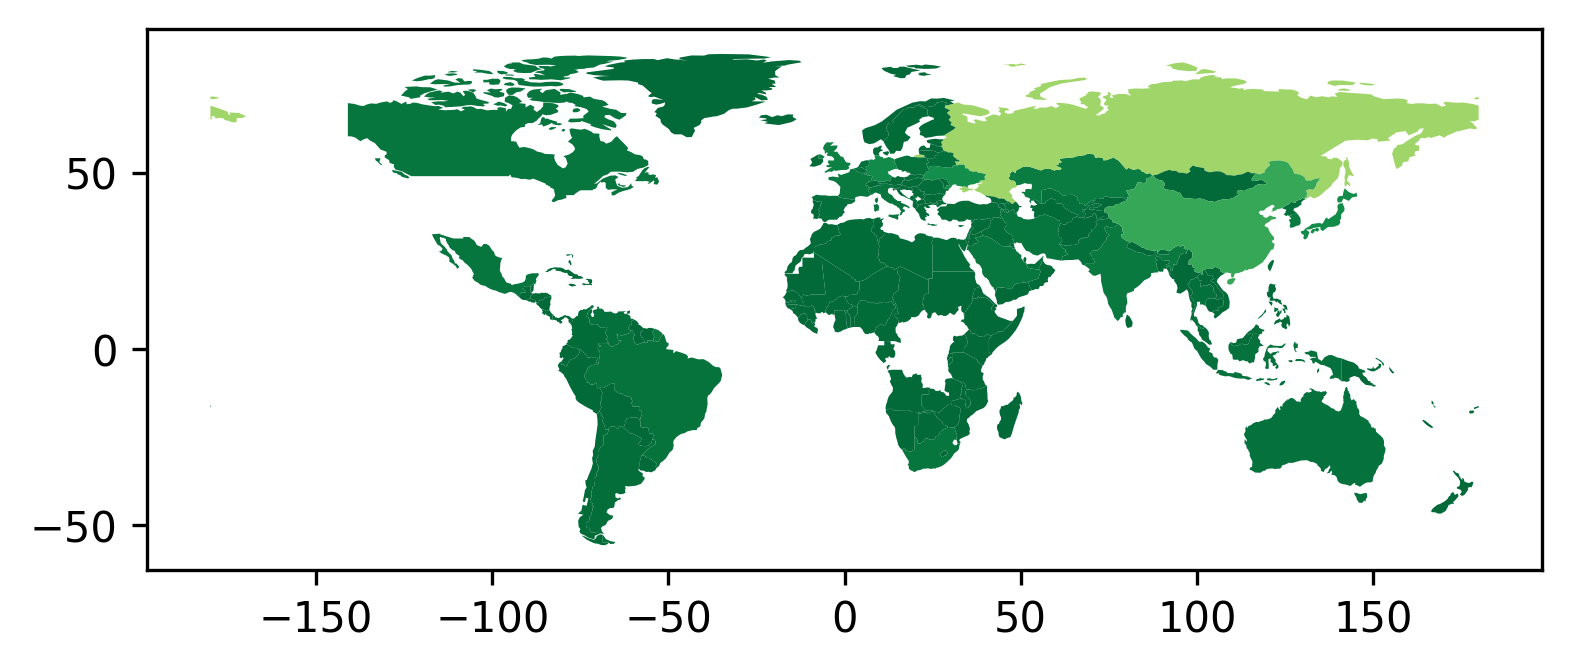

In [59]:
fig, ax = plt.subplots(dpi=300)
world.plot(ax=ax, column='Annual CO₂ emissions (tonnes )', cmap='RdYlGn_r')

# Asian countries

In [64]:
df=pd.read_csv(r'C:\Users\HP\Carbon emission\Asia.csv')


In [69]:
co3=df[['Entity',
'Annual CO₂ emissions (tonnes )']]

In [70]:
co3.columns=['country','Annual CO₂ emissions (tonnes )']

In [71]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [72]:
world=world.merge(co3,left_on='name',right_on='country',how='outer')

<AxesSubplot:>

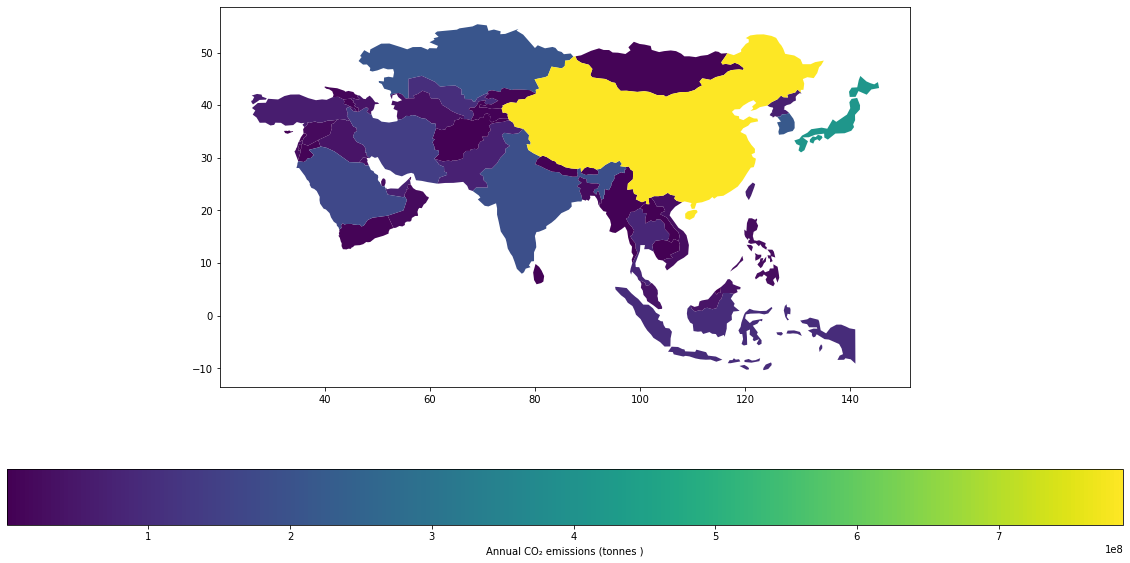

In [73]:
world.plot(column='Annual CO₂ emissions (tonnes )',figsize=(20,10),legend=True,legend_kwds={'label': "Annual CO₂ emissions (tonnes )",'orientation': "horizontal"})

<AxesSubplot:>

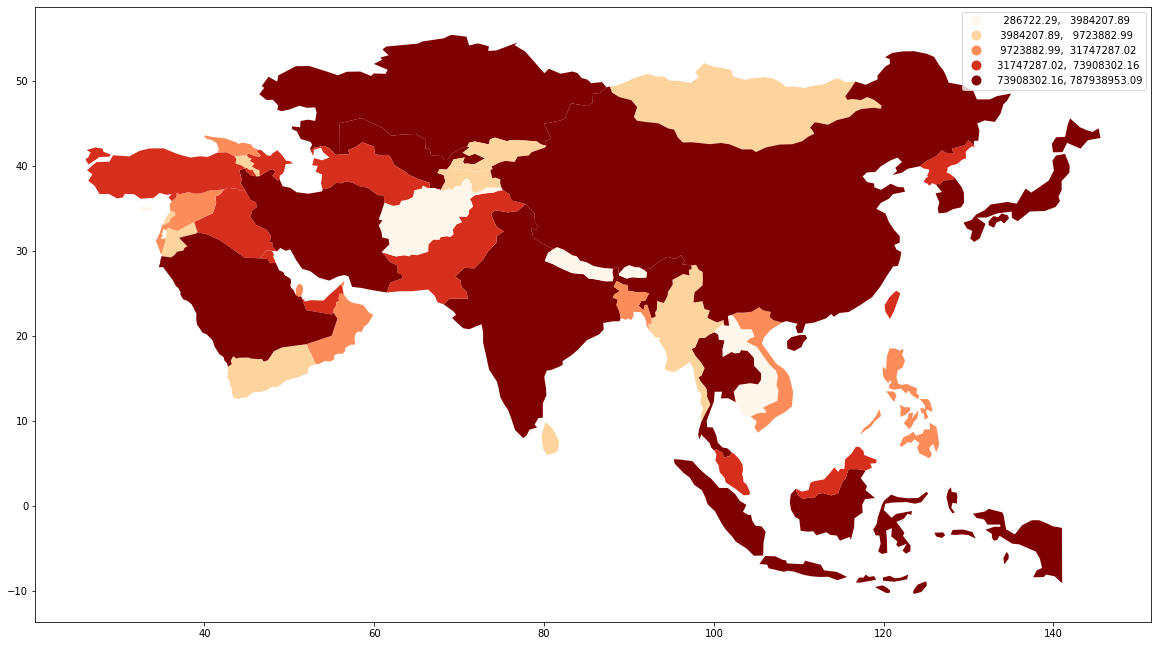

In [74]:
 world.plot(column='Annual CO₂ emissions (tonnes )', cmap='OrRd', scheme='quantiles',legend=True,figsize=(20,15))